# PRÁCTICA 1
# ESTIMACIÓN DE LA AUTOCORRELACIÓN

En muchas aplicaciones es necesario obtener la autocorrelación de un proceso aleatorio a partir de un
número finito de muestras de señal $x(n)$ ($n = 0,1, \dots, N-1$). Un estimador muy común es el siguiente:

\begin{equation}
\hat{r}_x(k) = \frac{1}{N} \sum_{n=|k|}^{N-1} x(n) x^*(n - |k|) 
\end{equation}


donde se está suponiendo implícitamente que $x(n) = 0$ fuera del intervalo considerado. Esto es equivalente
a considerar que se ha aplicado una ventana $w(n)$ rectangular a la señal $x_{\text{org}}(n)$ que originalmente se
extendía desde $n = -\infty$ hasta $n = \infty$, de modo que $x(n) = x_{\text{org}}(n) w(n)$.

Alternativamente, la expresión (1) puede entenderse como una convolución:

\begin{equation}
\hat{r}_x(k) = \frac{1}{N} x(k) * x^*(-k) \tag{2}
\end{equation}



### NOTA para implementación en Python:
Todas las comparaciones se efectuarán haciendo uso de las utilidades gráficas de `matplotlib.pyplot`.

### Módulos para la implementación en Python:
```python
import numpy as np
import matplotlib.pyplot as plt
```

___



# <span style="color:red;">NOTA</span>
<span style="color:red;">Nos ha preguntado varias cosas. En primer lugar, explicar el código de la práctica 6. También nos ha pedido explicar el resultado del ejercicio 6, es decir, por qué sale lo que sale con detalle y saber demostrarlo. Además, nos ha preguntado por ese "triángulo" de la estimación sesgada. Por último, nos ha preguntado cómo sería la autocorrelación "real" para el resultado del ejercicio 6. </span>

# EJERCICIO 1
**(Cuestión teórica)**  
Determinar si la estimación (1) propuesta para la autocorrelación tiene o no sesgo.

La estimación dada por  
$$\hat{r}_x(k) = \frac{1}{N} \sum_{n=|k|}^{N-1} x(n) x^*(n - |k|)$$  
se considera un **estimador sesgado** de la autocorrelación, ya que el factor de normalización es $\frac{1}{N}$ en lugar de $\frac{1}{N - |k|}$. Para que fuera no sesgado, debería compensarse la reducción en el número de términos efectivos cuando $|k|$ crece.

In [2]:
# (No hay código en este ejercicio, es una cuestión teórica)
pass

___

# EJERCICIO 2
Generar $N = 1000$ muestras de un ruido blanco Gaussiano de media nula y varianza unidad mediante
el comando `np.random.randn(N)`.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# EJERCICIO 2

N = 1000  
mu = 3.0
sigma = 1.0
                
x1 = np.random.normal(mu, sigma, N)     # Ruido blanco Gaussiano de media mu y varianza sigma^2         
x2 = np.random.randn(N)                 # Ruido blanco Gaussiano de media 0 y varianza 1
x3 = mu + sigma * np.random.randn(N)    # Ruido blanco Gaussiano de media mu y varianza sigma^2
x4 = np.random.uniform(-1, 1, N)        # Ruido blanco uniforme entre -1 y 1

seleccion = x1          # Seleccionar aquí la variable que se quiere analizar
print("Primeras 10 muestras del ruido generado:")
print(seleccion[:10])   # o seleccion[0:10] para Python 2
print("\nMedia aproximada:", np.mean(seleccion))
print("Varianza aproximada:", np.var(seleccion))

Primeras 10 muestras del ruido generado:
[2.14169003 2.82853227 2.72595308 2.78345677 2.39136674 4.58857786
 2.25196612 3.74934474 3.51664845 3.61304628]

Media aproximada: 3.045496922572825
Varianza aproximada: 0.9490127809067435


___

# EJERCICIO 3
Estimar la autocorrelación $r_x(k)$ ( $k = -(N - 1), \dots, N - 1$ de acuerdo con la expresión (1), y también haciendo uso de los comandos `convolve` (ecuación (2)) y `correlate` de numpy. Explicar los resultados obtenidos comparando gráficamente con la función de autocorrelación verdadera $r_x(k) = \delta(k)$.

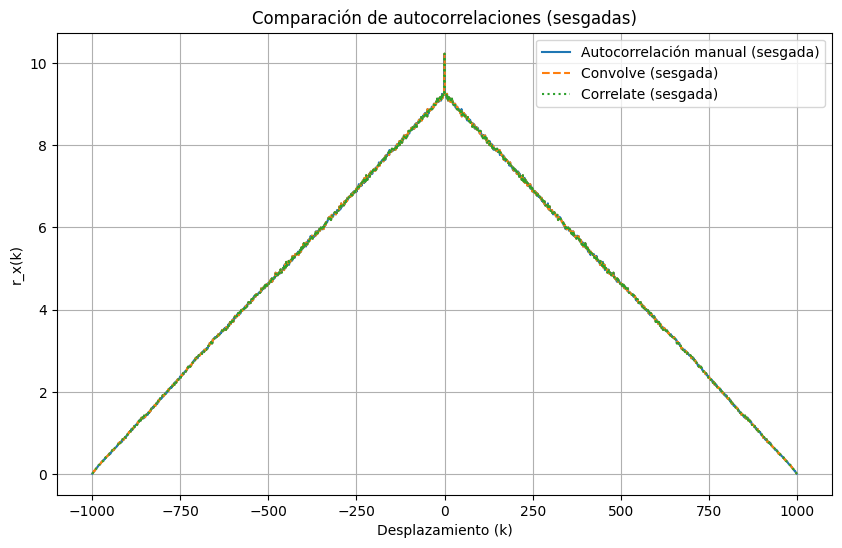

In [14]:
# EJERCICIO 3

# Seleccionamos x3 como la variable x
x = x1 # Seleccionar aquí la variable que se quiere analizar. Mire el ejercicio 2 para más detalles.

def autocorr_biased(x):
    N = len(x)
    r = np.zeros(2*N - 1, dtype=complex)  # k desde -(N-1) hasta (N-1)
    for k in range(-(N-1), N):
        idx = k + (N-1)
        suma = 0
        for n in range(abs(k), N):
            suma += x[n] * np.conjugate(x[n - abs(k)])
        r[idx] = suma / N
    return r

# Estimación manual (sesgada)
r_manual = autocorr_biased(x)

# Usando convolve (ecuación (2))
# r_x(k) = (1/N) * x(k) * x^*(-k) Equivale a convolucionar x(n) con x^*(-n) y dividir por N
r_conv = np.convolve(x, np.conjugate(x[::-1]), mode='full') / N

# Usando correlate de numpy (sesgado)
r_corr = np.correlate(x, x, mode='full') / N # Se divide por N para que sea no sesgada

lags = np.arange(-(N-1), N) # Genera array de enteros desde -(N-1) hasta N-1 (incluyendo -(N-1) y excluyendo N)

plt.figure(figsize=(10, 6))
plt.plot(lags, r_manual.real, label='Autocorrelación manual (sesgada)')
plt.plot(lags, r_conv.real, '--', label='Convolve (sesgada)')
plt.plot(lags, r_corr.real, ':', label='Correlate (sesgada)')
plt.title('Comparación de autocorrelaciones (sesgadas)')
plt.xlabel('Desplazamiento (k)')
plt.ylabel('r_x(k)')
plt.legend()
plt.grid(True)
plt.show()

Se obtienen resultados distintos para cada vector $xX$ (donde $X \in \{1, 2, 3, 4\}$ son los vectores del ejercicio anterior) ya que la varianza y la media de este varía. Recomiendo cambiar el vector x para diferentes ruidos con distintas medias, poner por ejemplo x=x3 y ver el resultado.

La autocorrelación se puede expresar en términos de una convolución. Se demuestra que:
$$ r_x(k) = \frac{1}{N}\sum_{k=-\infty}^{\infty} x(n)x^*(n-k) =  \frac{1}{N} x(k)*x^*(-k)$$

En la autocorrelación **sesgada** (dividiendo siempre por $N$) y con modo *full*, a medida que aumenta $|k|$, cada retardo suma menos productos (porque hay menos solapamiento entre los índices). Sin embargo, la normalización permanece fija en $N$. Esto provoca que la amplitud de la autocorrelación decrezca linealmente con $|k|$ y se forme esa "pirámide" para $xX$ donde la media no sea nula. Cuando esta media es cero, los valores varían entre negativos y positivos con la misma probabilidad y la acumulación de estos tenderá a la media.   

Para corregir el sesgo, se define la autocorrelación **no sesgada** como:

$$\tilde{r}_x(k) = \frac{N}{N - |k|} \hat{r}_x(k)$$
Podemos escribir esta relación como:

$$\hat{r}_x(k) = \left( 1 - \frac{|k|}{N} \right) \tilde{r}_x(k)$$

donde el término de ponderación $W_B(k)$  se define como:

$$W_B(k) = 1 - \frac{|k|}{N}$$

Este término actúa como un **factor de corrección**, eliminando el sesgo en la estimación. Hay que saber demostrar esto y saber la relación entre la autocorrelación sesgada y no sesgada (la relación entre estas viene dada por el factor de corrección).
___

# EJERCICIO 4
Obtener ahora la estima **sin sesgo** de la autocorrelación usando el comando `correlate` (MatLab: `xcorr`) de numpy. Comparar gráficamente esta estima con la obtenida mediante el estimador sesgado de los apartados anteriores.

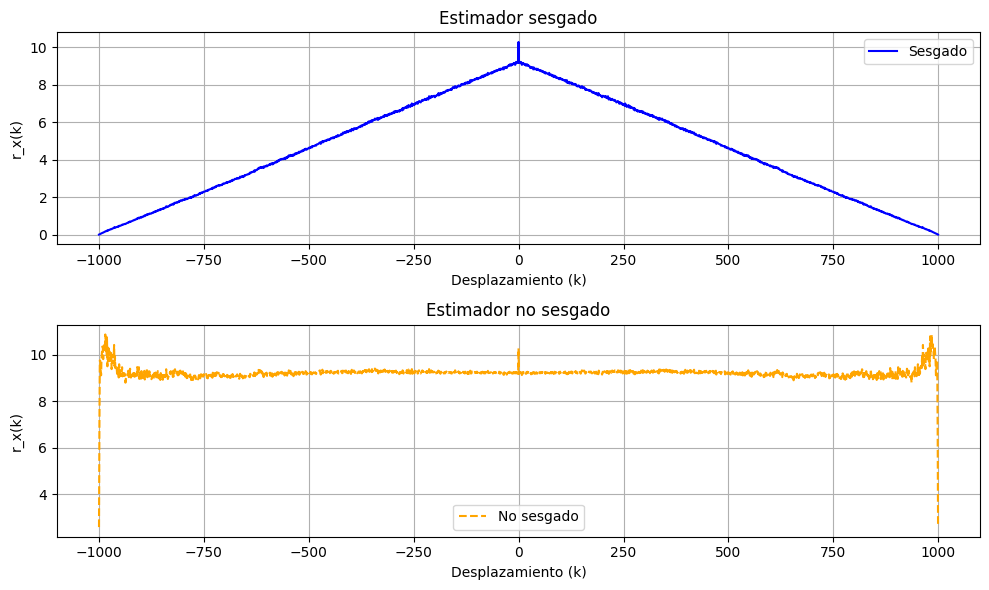

In [15]:
# EJERCICIO 4

x = x3
r_corr = np.correlate(x, x, mode='full') / N # Se divide por N para que sea no sesgada


def autocorr_unbiased(x):
    N = len(x)
    r = np.correlate(x, x, mode='full') / N # Autocorrelación sesgada
    lags = np.arange(-(N-1), N)
    
    # Normalización sin sesgo
    unbiased_r = np.zeros_like(r, dtype=float)  # Inicializa array de floats
    for i, k in enumerate(lags):
        unbiased_r[i] = r[i] * N/(N - abs(k))   # Transforma a no sesgado
    return unbiased_r, lags

r_unbiased, lags = autocorr_unbiased(x)         # LLama a la función autocorr_unbiased

plt.figure(figsize=(10, 6))

# Primer subplot: estimador sesgado en azul
plt.subplot(2, 1, 1)
plt.plot(lags, r_corr.real, color='blue', label='Sesgado')
plt.title('Estimador sesgado')
plt.xlabel('Desplazamiento (k)')
plt.ylabel('r_x(k)')
plt.legend()
plt.grid(True)

# Segundo subplot: estimador no sesgado en azul
plt.subplot(2, 1, 2)
plt.plot(lags, r_unbiased, '--', color='orange', label='No sesgado')
plt.title('Estimador no sesgado')
plt.xlabel('Desplazamiento (k)')
plt.ylabel('r_x(k)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

La versión **no sesgada** divide cada valor por $N - |k|$ en vez de N, por lo que corrige la disminución de muestras efectivas para grandes |$k$|. Cuando $k$ aumenta, la estimación es peor ya que se "participan" menos muestras y, por ende, el enfoque sin sesgo atrubuye en estos casos un "peso" menor. Es por ello que a medida que $|k|$ crece, la varianza de la estimación aumenta obteniendo una estimación menos precisa para los valores de los laterales, por eso hay como "ruido" en los laterales.

En caso de haber elegido un $x$ con media no nula, véase como la función está "elevada" a $m_{x}\cdot m_{x}$ ya que se trata de un momento no centrado pues se define como
$$ R_x(k) = VAR_x(k) + m_x^2$$
Como la varianza del ruido es una delta, la autocorrelación será una delta "subida" al cuadrado de la media. Para la autocorrelación sesgada, el resultado es el mismo pero multiplicado por el término de ponderación definido anteriormente.

El efecto de tener un valor muy alto o muy bajo en los laterales se explica de la siguiente forma. Cuando nos acercamos a los bordes, hay menos muestras disponibles para hacer la correlación. Para compensarlo, se divide por $(N-|k|)$ en lugar de $N$. El problema es que cuando $k$ se acerca a $N$, el denominador se vuelve muy pequeño, lo que amplifica los valores. Este es el efecto que se obtiene.
___

# EJERCICIO 5
Obtener las estimaciones de la autocorrelación con sesgo y sin sesgo para el mismo ruido anterior
pero añadiendo una media unitaria. ¿Cómo debería ser la autocorrelación original en este caso?
Explicar los resultados obtenidos.

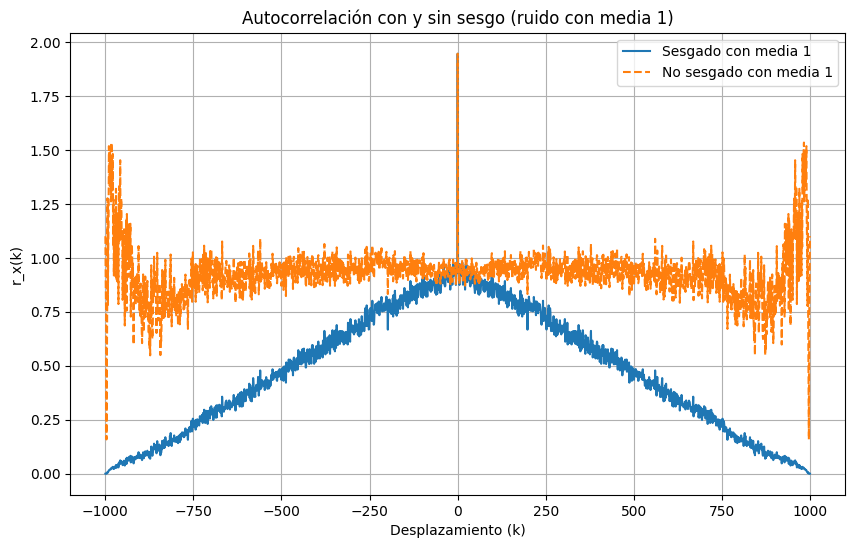

In [6]:
# EJERCICIO 5

# Generamos el mismo ruido pero con media 1
x_mean1 = np.random.randn(N) + 1

# Estimador sesgado
r_corr_mean1 = np.correlate(x_mean1, x_mean1, mode='full') / N

# Estimador no sesgado
r_unbiased_mean1, lags = autocorr_unbiased(x_mean1)

plt.figure(figsize=(10, 6))
plt.plot(lags, r_corr_mean1.real, label='Sesgado con media 1')
plt.plot(lags, r_unbiased_mean1, '--', label='No sesgado con media 1')
plt.title('Autocorrelación con y sin sesgo (ruido con media 1)')
plt.xlabel('Desplazamiento (k)')
plt.ylabel('r_x(k)')
plt.legend()
plt.grid(True)
plt.show()


El resultado se explica en el anterior ejercicio pero se explicará de nuevo.

Teóricamente, con media 1, la autocorrelación de una señal $x(n) = w(n) + 1$ 
(donde $w(n)$ es ruido blanco de varianza 1) tiene un valor en $k=0$ que 
incluye la varianza y el cuadrado de la media ($1^2 = 1$). Para $k \neq 0$, la autocorrelación debe reflejar la correlación de $w(n)$ 
(que es prácticamente $\delta(k)$ más la contribución de la media). 
Observamos por tanto un incremento en todos los valores de $r_x(k)$ debido a la media unitaria.
___

# EJERCICIO 6
Aplicar los estimadores de media y varianza muestral sobre 100 estimas de la autocorrelación, cada
una de ellas obtenida a partir de una secuencia distinta de ruido blanco de media unidad. ¿Qué
sucede si aumentas el número de estimas a 1000, 10000, etc? ¿A qué tiende la media? ¿Qué indica
la varianza? Comparar los resultados al usar los estimadores sesgado y no sesgado.

********************************************************************************
ESTIMACIÓN PARA 10 ESTIMAS
********************************************************************************


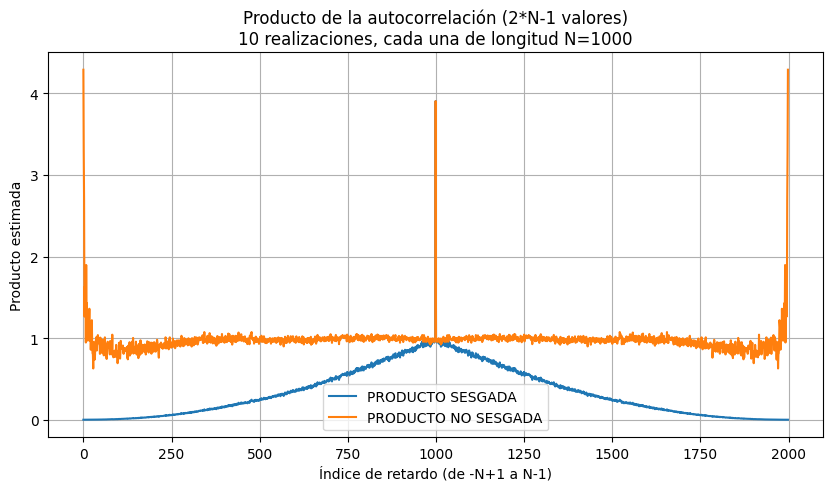

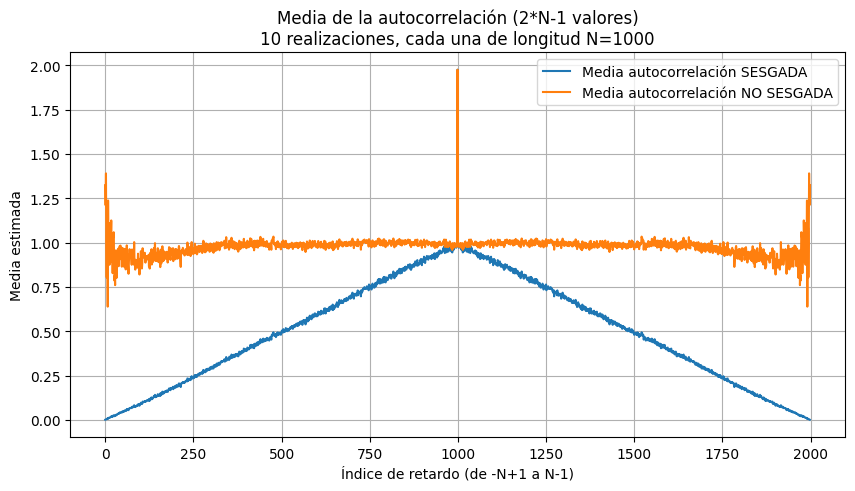

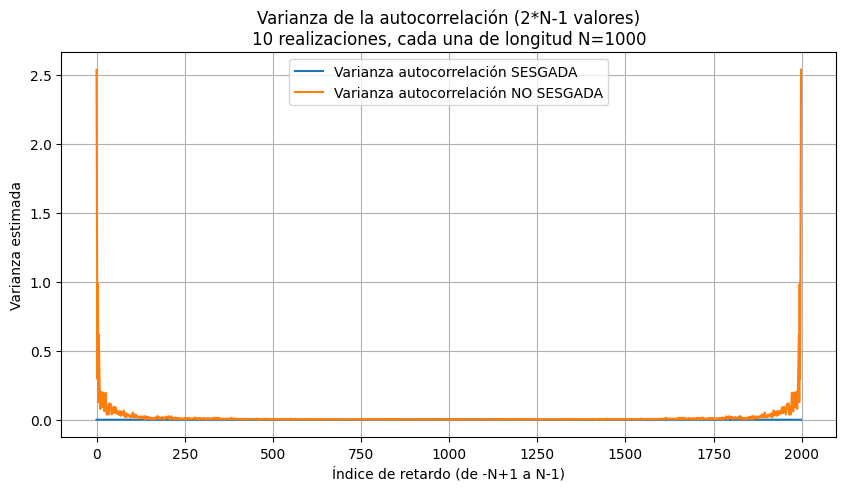

********************************************************************************
ESTIMACIÓN PARA 100 ESTIMAS
********************************************************************************


<Figure size 640x480 with 0 Axes>

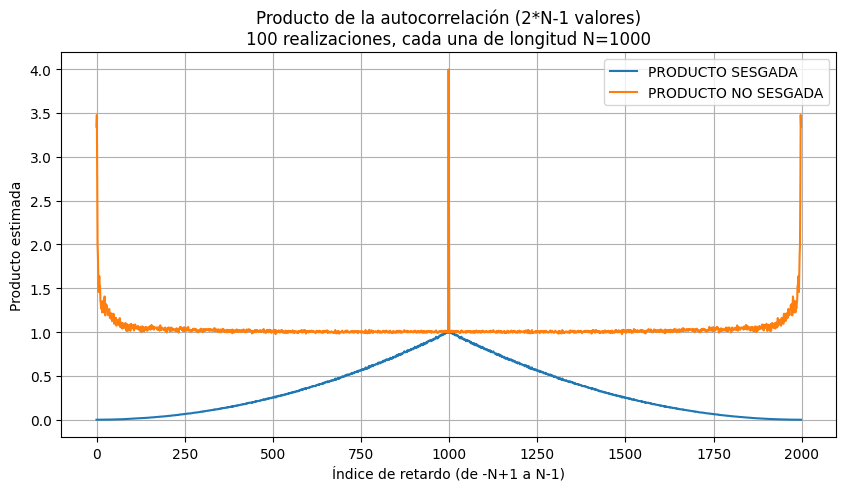

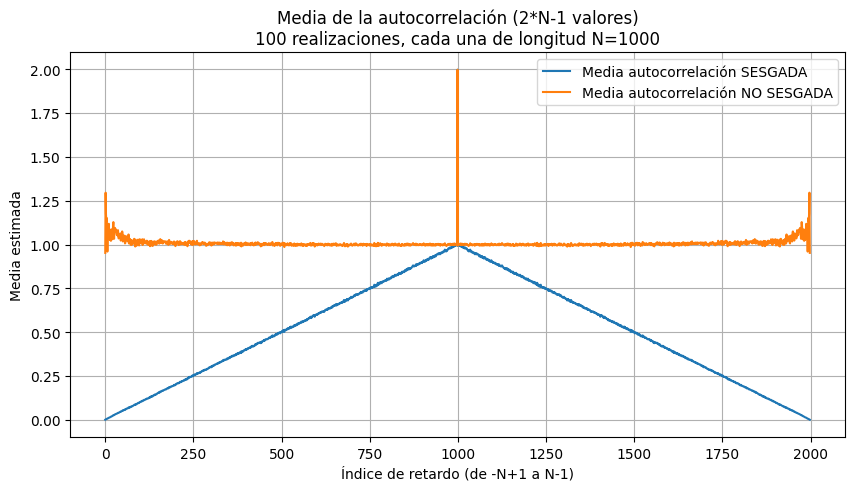

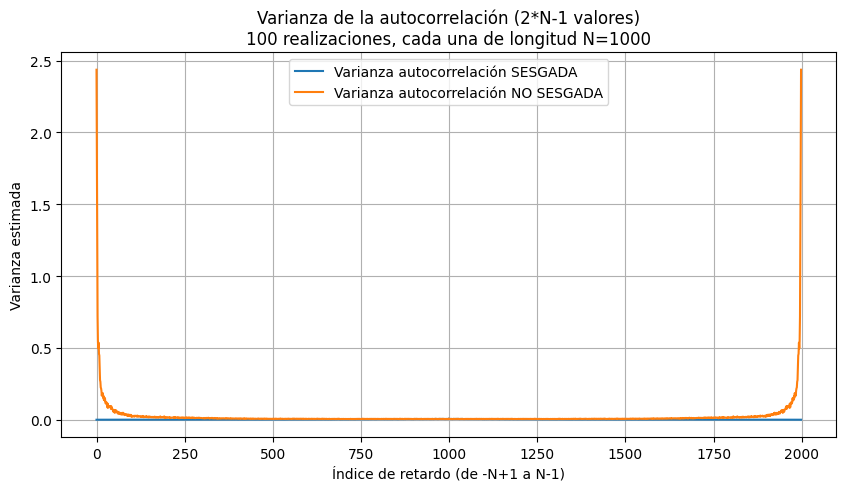

********************************************************************************
ESTIMACIÓN PARA 1000 ESTIMAS
********************************************************************************


<Figure size 640x480 with 0 Axes>

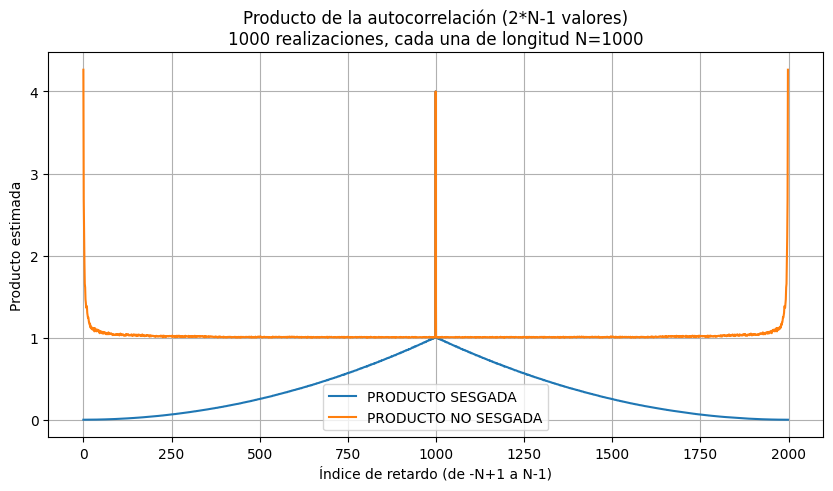

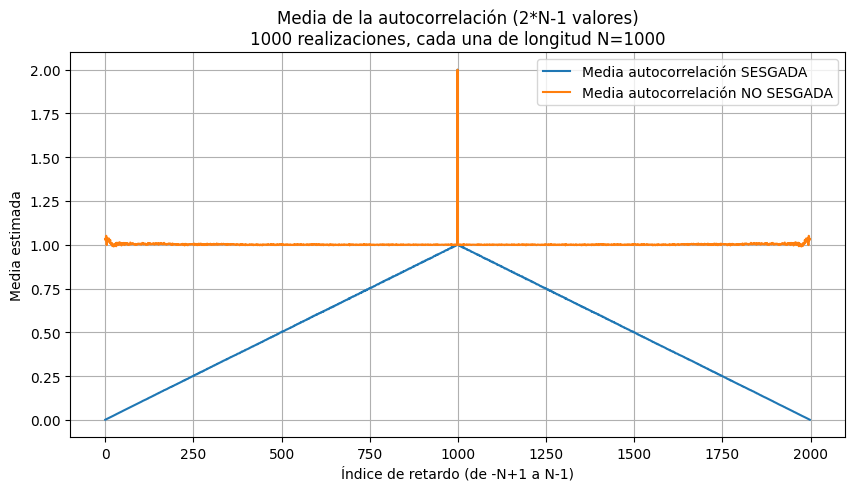

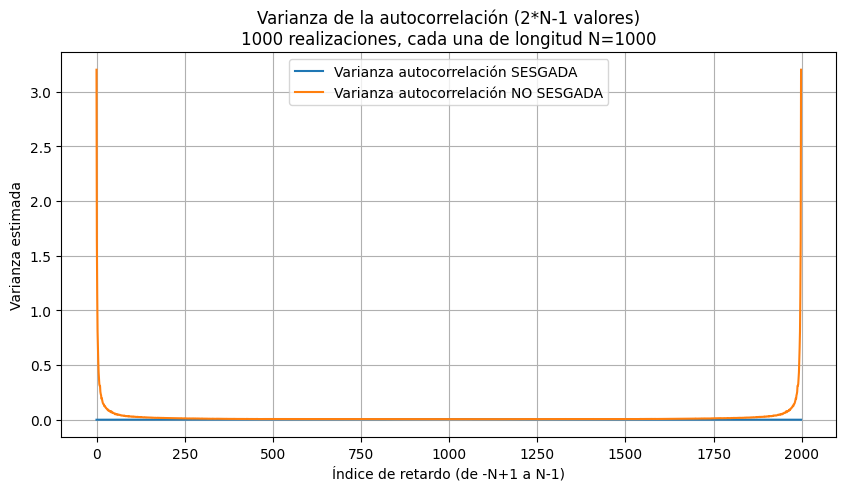

********************************************************************************
ESTIMACIÓN PARA 10000 ESTIMAS
********************************************************************************


<Figure size 640x480 with 0 Axes>

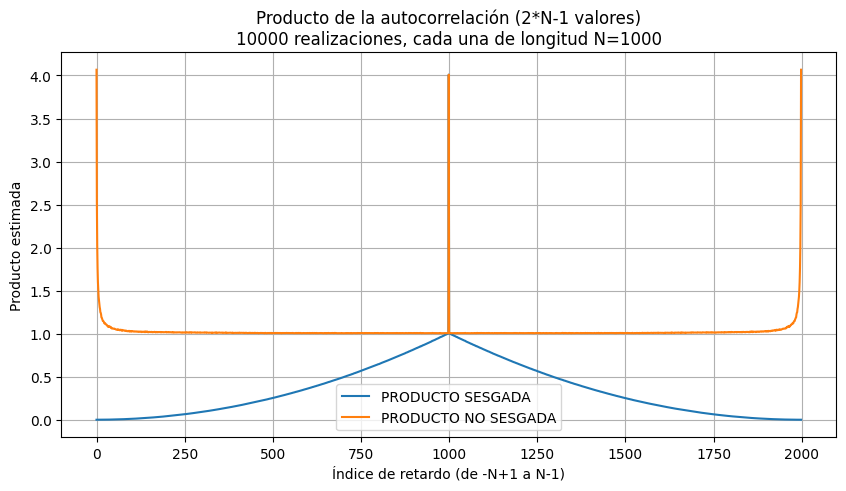

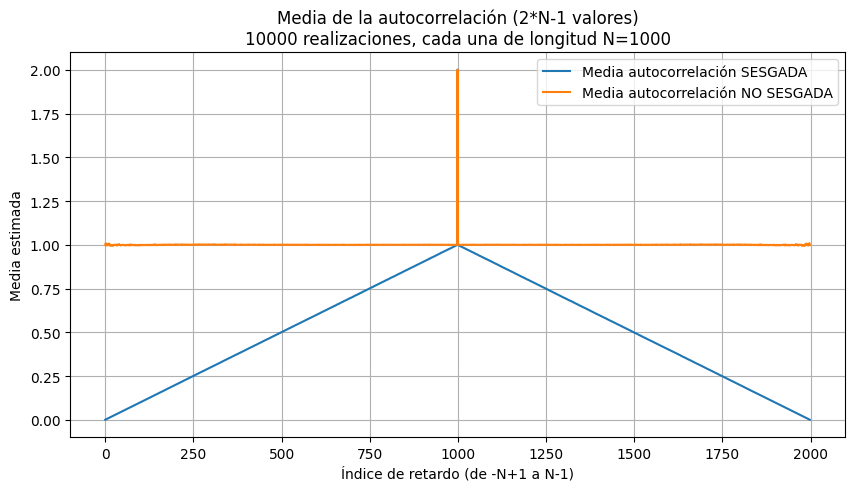

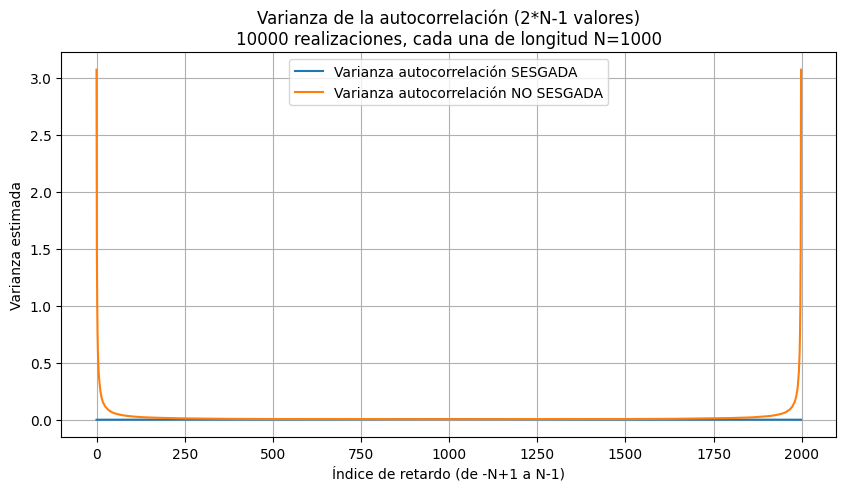

<Figure size 640x480 with 0 Axes>

In [ ]:
# Lista de tamaños de muestra que queremos probar
N_estimas = [10, 100, 1000, 10000]
N = 1000  # Número de estimaciones para cada valor de N

for estimas in N_estimas:
    
    
    #? Definir las estimas: matriz con N columnas y tantas filas como estimaciones
    X = np.zeros((N, estimas))
    
    for j in range(estimas):
        x = np.random.randn(N) + 1 # Genera muestra de ruido con media 1
        X[:, j] = x # Cada columna de X representa una estima, es decir, una señal de ruido blanco de media 1
    
    
    #? Calcula la autocorrelación para cada realización
    X_sesg = np.zeros((2*N - 1, estimas))   
    X_nosesg = np.zeros((2*N - 1, estimas))
    
    for j in range(estimas):
        r_sesg = np.correlate(X[:, j], X[:, j], mode='full') / N    # Estimador sesgado
        r_nosesg, _ = autocorr_unbiased(X[:, j])              # Estimador no sesgado
        
        X_sesg[:, j] = r_sesg
        X_nosesg[:, j] = r_nosesg


    #? Calcula la media y varianza de las estimaciones
    suma_r_sesg = np.zeros(2*N - 1)
    suma_r_nosesg = np.zeros(2*N - 1)
    
    # diferencia_r_sesg = np.zeros(2*N - 1)
    # diferencia_r_nosesg = np.zeros(2*N - 1)
    
    producto_r_sesg = np.zeros(2*N - 1)
    producto_r_nosesg = np.zeros(2*N - 1)
    
    for j in range(estimas):
        suma_r_sesg += X_sesg[:, j] / estimas
        suma_r_nosesg += X_nosesg[:, j] / estimas
    
        producto_r_sesg += X_sesg[:, j] * X_sesg[:, j] / estimas
        producto_r_nosesg += X_nosesg[:, j] * X_nosesg[:, j] / estimas
        
    media_estimada_sesg = suma_r_sesg
    media_estimada_nosesg = suma_r_nosesg
    
    varianza_estimada_sesg = producto_r_sesg - media_estimada_sesg**2
    varianza_estimada_nosesg = producto_r_nosesg - media_estimada_nosesg**2
    
    
    #     diferencia_r_sesg += X_sesg[:, j] - suma_r_sesg
    #     diferencia_r_nosesg += X_nosesg[:, j] - suma_r_nosesg

    # media_estimada_sesg = suma_r_sesg
    # media_estimada_nosesg = suma_r_nosesg
    
    # varianza_estimada_sesg = diferencia_r_sesg**2 / estimas
    # varianza_estimada_nosesg = diferencia_r_nosesg**2 / estimas


    #? Imprimir los resultados usando un gráfico
    print("*" * 80 + f"\nESTIMACIÓN PARA {estimas} ESTIMAS\n" + "*" * 80)
    
    plt.figure(figsize=(10, 5))
    plt.plot(producto_r_sesg, label='PRODUCTO SESGADA')
    plt.plot(producto_r_nosesg, label='PRODUCTO NO SESGADA')
    plt.title(f"Producto de la autocorrelación (2*N-1 valores)\n{estimas} realizaciones, cada una de longitud N={N}")
    plt.xlabel("Índice de retardo (de -N+1 a N-1)")
    plt.ylabel("Producto estimada")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    plt.figure(figsize=(10, 5))
    plt.plot(media_estimada_sesg, label='Media autocorrelación SESGADA')
    plt.plot(media_estimada_nosesg, label='Media autocorrelación NO SESGADA')
    plt.title(f"Media de la autocorrelación (2*N-1 valores)\n{estimas} realizaciones, cada una de longitud N={N}")
    plt.xlabel("Índice de retardo (de -N+1 a N-1)")
    plt.ylabel("Media estimada")
    plt.legend()
    plt.grid(True)
    plt.show()  

    plt.figure(figsize=(10, 5))
    plt.plot(varianza_estimada_sesg, label='Varianza autocorrelación SESGADA')
    plt.plot(varianza_estimada_nosesg, label='Varianza autocorrelación NO SESGADA')
    plt.title(f"Varianza de la autocorrelación (2*N-1 valores)\n{estimas} realizaciones, cada una de longitud N={N}")
    plt.xlabel("Índice de retardo (de -N+1 a N-1)")
    plt.ylabel("Varianza estimada")
    plt.legend()
    plt.grid(True)
    plt.show()
    




He visto oportuno incluir el resultado del producto ya que "visualmente" puede verse la varianza como el producto (autocorrelación) menos la media al cuadrado. De ahí, se deduce que el resultado debe ser nulo.

Ha preguntado cómo sería la "autocorrelación real". Se refiere a cómo sería la autocorrelación de forma teórica. Se puede demostrar que
$$ R_x(k, l) = COV_x(k, l) + m^2_x $$
Si la x es una variable aleatoria gausiana (por tanto independiente), su varianza será la delta. Por tanto, para la ecuación anterior, la covarianza sólo existirá para $l=k$ y tendremos una delta. Es lo que aparece en las figuras si añadimos además el cuadrado de las medias.

Se analiza la estimación de la función de autocorrelación y su varianza en función del tamaño de la muestra. A continuación, se presentan las expresiones matemáticas útiles correspondientes:

\begin{align} \notag
\hat{r}_x(k) &= \frac{1}{N} \sum_{n=1}^{N-k} x(n) x(n-k) \\ \notag
\tilde{r}_x(k) &= \frac{1}{N-|k|} \sum_{n=|k|+1}^{N} x(n) x(n-|k|) \notag
\end{align}

Entonces tenemos la siguiente relación:
\begin{align} \notag
        \hat{r}_x(k) &= \left(\frac{N-|k|}{N}\right) \tilde{r}_x(k) \\ \notag
                    &= \left(1 - \frac{|k|}{N} \right) \tilde{r}_x(k) \notag
\end{align}

Si tomamos la esperanza de la estimación, podemos poner una estimación, por ejemplo, la no sesgada, en función de la estimación sesgada:

$$
E[\hat{r}_x(k)] = E\left[\left(\frac{N-|k|}{N}\right) \tilde{r}_x(k) \right] = \left(\frac{N-|k|}{N}\right) E[\tilde{r}_x(k)]
$$

Si hayamos lo mismo para la varianza resulta en:
\begin{align} \notag
        VAR[\hat{r}_x(k)] &= E\left[\left(\hat{r}_x(k) - E[\hat{r}_x(k)]\right)^2\right] \\ \notag
        &= \left(\frac{N-|k|}{N}\right)^2 E\left[\left(\tilde{r}_x(k) - E[\tilde{r}_x(k)]\right)^2\right] \\ \notag
        &= \left(\frac{N-|k|}{N}\right)^2 VAR[\tilde{r}_x(k)] \notag
\end{align}
Estas ecuaciones muestran cómo la estimación de la autocorrelación y su varianza dependen del tamaño de la muestra $N$ y del desfase $k$.
___
